<a href="https://colab.research.google.com/github/RafaelaAltermann/wine/blob/master/Airbnb_RJ_new_data_2023.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**This is the data analysis of the 2023 Airbnb dataset. The goal is to provide an estimate of accommodation prices, focusing on neighborhoods.**

**The dataset includes around 32,000 observations with 75 columns containing both categorical and numeric values.**

**It is structured in five steps: Import Libraries, Data Cleaning, Exploratory Data Analysis (EDA), Graphics, and Building a Regression Model.**

**The data source link is below:**

http://insideairbnb.com/get-the-data

#Step 1 : Importing Libraries

In [65]:
import pandas as pd
import numpy as np
from pydrive.drive import GoogleDrive
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px


In [66]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


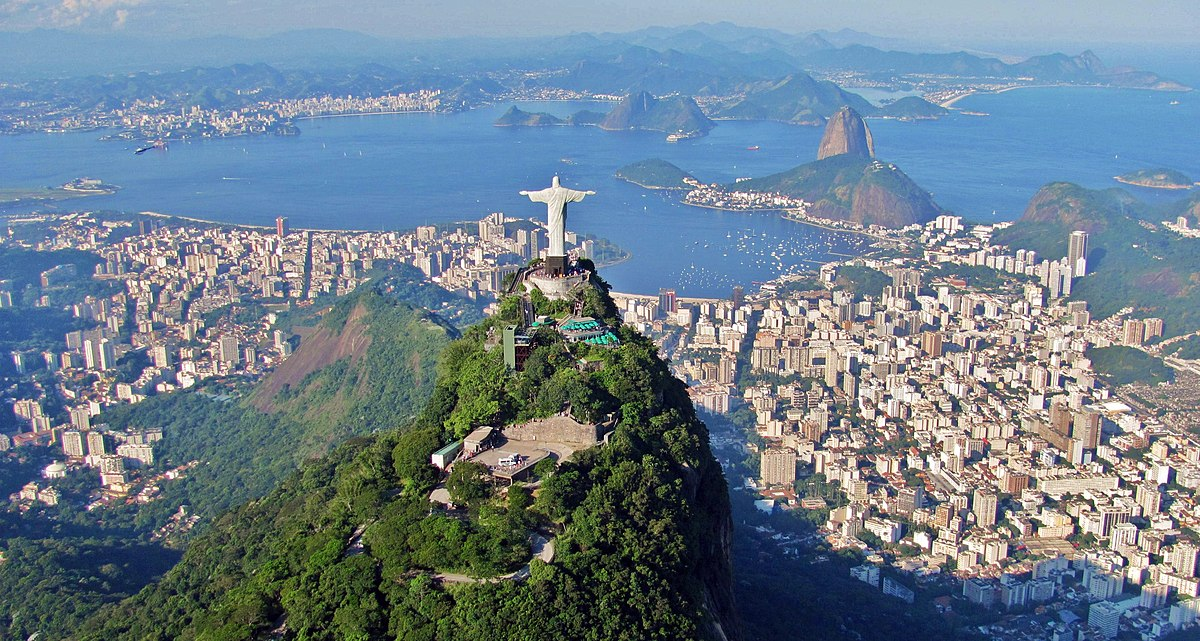

In [67]:
from IPython.display import Image, display

display(Image(filename='/content/drive/MyDrive/Cidade_Maravilhosa.jpg',width=9000, height=500, embed=True))

#Step 2: Loading the dataset

In [68]:
df_listings= pd.read_csv('/content/drive/MyDrive/listings.csv.gz')


In [69]:
df_listings.head()

,id,listing_url,scrape_id,last_scraped,source,name,description,neighborhood_overview,picture_url,host_id,...,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,231497,https://www.airbnb.com/rooms/231497,20230922043705,2023-09-22,city scrape,Rental unit in Rio de Janeiro · ★4.73 · 1 bedr...,"This is a big studio at the end of Copacabana,...",NaN,https://a0.muscache.com/pictures/3582382/ee8ac...,1207700,...,4.92,4.90,4.65,NaN,f,4,4,0,0,0.54
1,231516,https://www.airbnb.com/rooms/231516,20230922043705,2023-09-22,city scrape,Rental unit in Rio de Janeiro · ★4.71 · 1 bedr...,"Special location of the building, on Copacaban...",NaN,https://a0.muscache.com/pictures/3671683/d74b4...,1207700,...,4.86,4.93,4.38,NaN,f,4,4,0,0,0.20
2,236991,https://www.airbnb.com/rooms/236991,20230922043705,2023-09-23,city scrape,Rental unit in Rio de Janeiro · ★4.89 · 1 bedr...,"Aconchegante, amplo, básico, arejado, iluminad...","Copacabana, apelidada a princesinha do mar, fa...",https://a0.muscache.com/pictures/5725a59b-147d...,1241662,...,4.96,4.99,4.89,NaN,f,2,2,0,0,0.65
3,17878,https://www.airbnb.com/rooms/17878,20230922043705,2023-09-23,city scrape,Condo in Rio de Janeiro · ★4.70 · 2 bedrooms ·...,Please note that elevated rates applies for Ne...,This is the one of the bests spots in Rio. Bec...,https://a0.muscache.com/pictures/65320518/3069...,68997,...,4.91,4.77,4.67,NaN,f,1,1,0,0,1.87
4,25026,https://www.airbnb.com/rooms/25026,20230922043705,2023-09-22,city scrape,Rental unit in Rio de Janeiro · ★4.71 · 1 bedr...,"**Fully renovated in Dec 2022, new kitchen, n...",Copacabana is a lively neighborhood and the ap...,https://a0.muscache.com/pictures/a745aa21-b8dd...,102840,...,4.92,4.84,4.59,NaN,f,1,1,0,0,1.68


In [70]:
df_listings.describe()

,id,scrape_id,host_id,host_listings_count,host_total_listings_count,neighbourhood_group_cleansed,latitude,longitude,accommodates,bathrooms,...,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,license,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
count,3.196400e+04,3.196400e+04,3.196400e+04,31961.000000,31961.000000,0.0,31964.000000,31964.000000,31964.000000,0.0,...,23668.000000,23667.000000,23665.000000,23667.00000,0.0,31964.000000,31964.000000,31964.000000,31964.000000,23824.000000
mean,3.514699e+17,2.023092e+13,1.663077e+08,16.112450,27.273020,NaN,-22.967574,-43.251361,4.041265,NaN,...,4.881593,4.866827,4.861961,4.69660,NaN,8.839319,8.010825,0.707139,0.111719,0.974190
std,3.999653e+17,0.000000e+00,1.684315e+08,89.082309,134.207472,NaN,0.035182,0.100595,2.370380,NaN,...,0.321587,0.346049,0.322802,0.44839,NaN,23.515196,23.328498,1.735520,0.918342,1.127053
min,1.787800e+04,2.023092e+13,1.671000e+03,1.000000,1.000000,NaN,-23.073276,-43.723009,1.000000,NaN,...,1.000000,1.000000,1.000000,1.00000,NaN,1.000000,0.000000,0.000000,0.000000,0.010000
25%,2.184739e+07,2.023092e+13,2.258631e+07,1.000000,1.000000,NaN,-22.984820,-43.310047,2.000000,NaN,...,4.890000,4.870000,4.850000,4.61000,NaN,1.000000,1.000000,0.000000,0.000000,0.170000
50%,5.261496e+07,2.023092e+13,8.693849e+07,2.000000,3.000000,NaN,-22.972860,-43.195670,4.000000,NaN,...,5.000000,5.000000,4.980000,4.81000,NaN,2.000000,1.000000,0.000000,0.000000,0.570000
75%,7.814279e+17,2.023092e+13,3.004090e+08,5.000000,7.000000,NaN,-22.956165,-43.185946,5.000000,NaN,...,5.000000,5.000000,5.000000,5.00000,NaN,4.000000,3.000000,1.000000,0.000000,1.380000
max,9.855551e+17,2.023092e+13,5.379850e+08,1311.000000,1803.000000,NaN,-22.749690,-43.104400,16.000000,NaN,...,5.000000,5.000000,5.000000,5.00000,NaN,163.000000,159.000000,18.000000,15.000000,14.780000


In [71]:
df_listings.describe(include=['O'])

,listing_url,last_scraped,source,name,description,neighborhood_overview,picture_url,host_url,host_name,host_since,...,property_type,room_type,bathrooms_text,amenities,price,has_availability,calendar_last_scraped,first_review,last_review,instant_bookable
count,31964,31964,31964,31964,31305,16739,31964,31964,31961,31961,...,31964,31964,31936,31964,31964,31964,31964,23824,23824,31964
unique,31964,2,2,13710,29622,14869,31331,19868,5841,4283,...,87,4,49,29763,1962,2,2,3221,1496,2
top,https://www.airbnb.com/rooms/231497,2023-09-22,city scrape,Rental unit in Rio de Janeiro · 1 bedroom · 1 ...,Relaxe com toda a família nesta acomodação tra...,Copacabana,https://a0.muscache.com/pictures/miso/Hosting-...,https://www.airbnb.com/users/show/91654021,Daniel,2013-04-19,...,Entire rental unit,Entire home/apt,1 bath,[],$300.00,t,2023-09-22,2023-02-22,2023-09-10,f
freq,1,22787,28636,1019,165,82,18,163,333,169,...,19242,24858,14198,134,815,30940,22787,366,1973,24412


Calculating descriptive statistics for columns containing object (string) data in the DataFrame. This is useful for understanding the composition and distribution of text data.

In [72]:
df_listings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31964 entries, 0 to 31963
Data columns (total 75 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   id                                            31964 non-null  int64  
 1   listing_url                                   31964 non-null  object 
 2   scrape_id                                     31964 non-null  int64  
 3   last_scraped                                  31964 non-null  object 
 4   source                                        31964 non-null  object 
 5   name                                          31964 non-null  object 
 6   description                                   31305 non-null  object 
 7   neighborhood_overview                         16739 non-null  object 
 8   picture_url                                   31964 non-null  object 
 9   host_id                                       31964 non-null 

#Step 3 : Data Cleaning

In [73]:
def examine_missing_values(data):
    data_na= data.isnull().sum().sort_values(ascending=False)
    data_na_percent = (data.isnull().sum()/len(data)*100).sort_values(ascending=False)
    missing_data = pd.concat([data_na, data_na_percent], axis=1, keys=['Total', 'Percent'])
    return missing_data

In [74]:
missing_data = examine_missing_values(df_listings)
missing_data.head(10)

,Total,Percent
calendar_updated,31964,100.000000
license,31964,100.000000
neighbourhood_group_cleansed,31964,100.000000
bathrooms,31964,100.000000
host_about,16121,50.434864
neighbourhood,15225,47.631711
neighborhood_overview,15225,47.631711
review_scores_location,8299,25.963584
review_scores_accuracy,8297,25.957327
review_scores_communication,8297,25.957327


In [75]:
#Remove columns with no value
df_listings.drop(['calendar_updated','license','neighbourhood_group_cleansed','bathrooms'], axis=1, inplace=True)
df_listings.shape

(31964, 71)

I don't need the columns with URL, id and host information.
For better data cleaning, I will select only the columns useful for the project.

In [76]:
print(df_listings.columns.tolist())

['id', 'listing_url', 'scrape_id', 'last_scraped', 'source', 'name', 'description', 'neighborhood_overview', 'picture_url', 'host_id', 'host_url', 'host_name', 'host_since', 'host_location', 'host_about', 'host_response_time', 'host_response_rate', 'host_acceptance_rate', 'host_is_superhost', 'host_thumbnail_url', 'host_picture_url', 'host_neighbourhood', 'host_listings_count', 'host_total_listings_count', 'host_verifications', 'host_has_profile_pic', 'host_identity_verified', 'neighbourhood', 'neighbourhood_cleansed', 'latitude', 'longitude', 'property_type', 'room_type', 'accommodates', 'bathrooms_text', 'bedrooms', 'beds', 'amenities', 'price', 'minimum_nights', 'maximum_nights', 'minimum_minimum_nights', 'maximum_minimum_nights', 'minimum_maximum_nights', 'maximum_maximum_nights', 'minimum_nights_avg_ntm', 'maximum_nights_avg_ntm', 'has_availability', 'availability_30', 'availability_60', 'availability_90', 'availability_365', 'calendar_last_scraped', 'number_of_reviews', 'number_o

In [77]:
# List of columns you want to keep

selected_columns = ['neighbourhood', 'neighbourhood_cleansed', 'latitude', 'longitude','property_type', 'room_type',
                    'accommodates', 'bedrooms', 'beds', 'price', 'minimum_nights_avg_ntm', 'maximum_nights_avg_ntm',
                    'has_availability', 'availability_30','review_scores_rating', 'review_scores_accuracy']

# Create a new DataFrame with only the desired columns
df = df_listings[selected_columns]
df.shape

(31964, 16)



**Dictionary of variables**


*    neighbourhood: The neighborhood where the property is located.
*    neighbourhood_cleansed: The cleaned and standardized name of the neighborhood.
*    latitude, longitude: Geographic coordinates of the property.
*    property_type: The type of property (e.g., "Entire rental unit").
*    room_type: The type of room (e.g., "Entire home/apt").
*    accommodates: The number of guests the property can accommodate.
*    bedrooms: The number of bedrooms in the property.
*    beds: The number of beds in the property.
*    price: The rental price.
*    minimum_nights_avg_ntm, maximum_nights_avg_ntm: The average of the minimum and maximum nights allowed for booking.
*   has_availability: Indicates whether the property has availability.
*    availability_30: The number of days the property is available in the next 30 days.
*    review_scores_rating: The average rating given by reviews.
*    review_scores_accuracy: The average accuracy rating in reviews.




In [78]:
pd.DataFrame(df.isna().sum())

,0
neighbourhood,15225
neighbourhood_cleansed,0
latitude,0
longitude,0
property_type,0
room_type,0
accommodates,0
bedrooms,7347
beds,175
price,0


In [79]:
print(df[['neighbourhood', 'neighbourhood_cleansed',]].head(30))

                           neighbourhood neighbourhood_cleansed
0                                    NaN             Copacabana
1                                    NaN             Copacabana
2                 Rio de Janeiro, Brazil             Copacabana
3                 Rio de Janeiro, Brazil             Copacabana
4                 Rio de Janeiro, Brazil             Copacabana
5            Rio, Rio de Janeiro, Brazil             Copacabana
6                                    NaN             Copacabana
7                 Rio de Janeiro, Brazil             Copacabana
8                                    NaN             Copacabana
9        Ipanema, Rio de Janeiro, Brazil                Ipanema
10                Rio de Janeiro, Brazil               Botafogo
11           Rio, Rio de Janeiro, Brazil             Copacabana
12                Rio de Janeiro, Brazil             Copacabana
13                                   NaN             Copacabana
14                Rio de Janeiro, Brazil

In [80]:
# Drop neighbourhood because neighbourhood_cleansed contains better data
df.drop('neighbourhood', axis=1, inplace=True)

<ipython-input-80-67e288f459f6>:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [81]:
# Drop the samples missing information
df= df[df['bedrooms'].notna()]
df= df[df['review_scores_rating'].notna()]
df= df[df['review_scores_accuracy'].notna()]
df= df[df['beds'].notna()]
df.shape

(18368, 15)

In [82]:
#For better understanding, rename the column ' neighbourhood_cleansed' to 'neighbourhood'
df.rename(columns={'neighbourhood_cleansed': 'neighbourhood'}, inplace=True)

In [83]:
# Find columns with duplicate values
columns_duplicate = df.columns[df.columns.duplicated()]
df = df.drop(columns_duplicate, axis=1)

In [84]:
df.shape

(18368, 15)

**Rechecking blank columns**

In [85]:
pd.DataFrame(df.isna().sum())

,0
neighbourhood,0
latitude,0
longitude,0
property_type,0
room_type,0
accommodates,0
bedrooms,0
beds,0
price,0
minimum_nights_avg_ntm,0



**Clean price strings by removing the "$" symbol, blank spaces and commas**

In [86]:
coluna =df['price']
print(coluna)

0        $180.00
1        $350.00
2        $190.00
3        $279.00
4        $330.00
          ...   
31772    $200.00
31774    $160.00
31813    $226.00
31825    $380.00
31919    $308.00
Name: price, Length: 18368, dtype: object


Please note that prices are in dollars

In [87]:
def clean_price_string(value):
    if isinstance(value, (float, int)):
        return value
    else:
        return float(str(value).replace("$", "").replace(",", "").replace(" ", ""))

# clean price
df["price"] = df["price"].apply(clean_price_string)

In [88]:
column =df['price']
print(column)

0        180.0
1        350.0
2        190.0
3        279.0
4        330.0
         ...  
31772    200.0
31774    160.0
31813    226.0
31825    380.0
31919    308.0
Name: price, Length: 18368, dtype: float64


**plots to find price outliers**

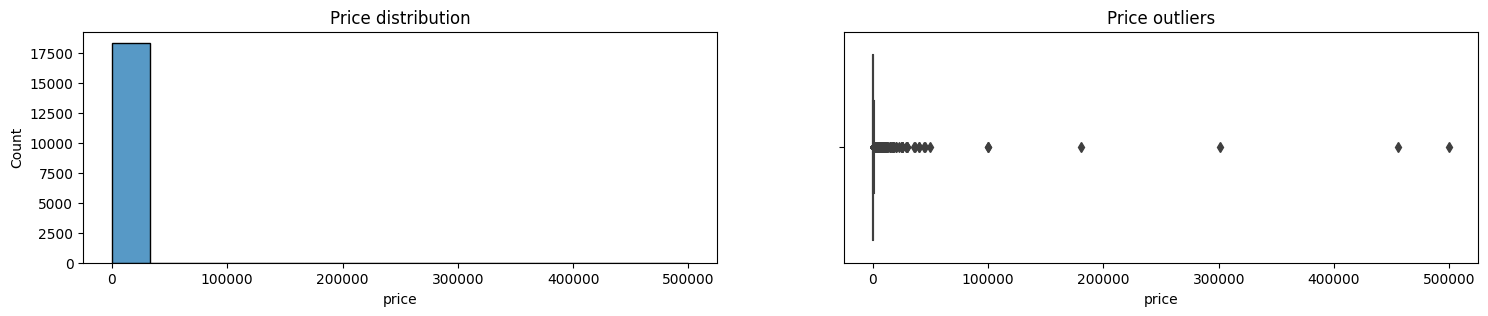

In [89]:
fig, (ax1, ax2) = plt.subplots(ncols=2, sharey=False, figsize=(18, 3))

# Distribution plot
sns.histplot(df['price'], kde=False, ax=ax1, bins=15)
ax1.grid(False)
ax1.set_title('Price distribution')
ax1.set_ylabel('Count')

# Box plot
sns.boxplot(x=df['price'], ax=ax2)
ax2.grid(False)
ax2.set_title('Price outliers')
ax2.set_ylabel('')

plt.show()

In [90]:
# The average price
average_price = df['price'].mean()
print(f'The average price is: ${average_price:.2f}')

The average price is: $656.95


In [91]:
# Check the number of values above $ 1200.00 for the 'price' variable.
print("\nprice: values more than $ 1200")
print("{} entries".format(len(df[df.price > 1200])))
print("{:.4f}%".format((len(df[df.price > 1200]) / df.shape[0])*100))


price: values more than $ 1200
1253 entries
6.8216%


In [92]:
df = df[df['price'] <= 1200]

In [93]:
# The new average price
new_average_price = df['price'].mean()
print(f'Correction of the median in the "Price" column. Now the average price is : ${new_average_price:.2f}')

Correction of the median in the "Price" column. Now the average price is : $384.44


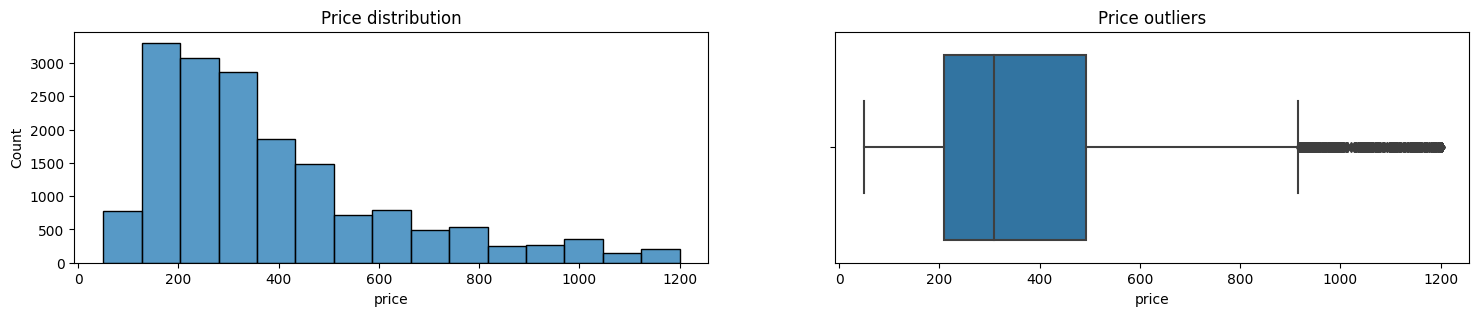

In [94]:
fig, (ax1, ax2) = plt.subplots(ncols=2, sharey=False, figsize=(18, 3))

# Distribution plot
sns.histplot(df['price'], kde=False, ax=ax1, bins=15)
ax1.grid(False)
ax1.set_title('Price distribution')
ax1.set_ylabel('Count')

# Box plot
sns.boxplot(x=df['price'], ax=ax2)
ax2.grid(False)
ax2.set_title('Price outliers')
ax2.set_ylabel('')

plt.show()

# Step 4: Data Visualization and Exploratory Data Analysis (AED)

#4.1 - Map of Brazil - The city of Rio de Janeiro

In [95]:
# Sample data
data = {
    'lat': [-22.96592],  # Coordinates of Rio de Janeiro
    'lon': [-43.17896],
    'name': ['Rio de Janeiro']}

# Define the center for Brazil and Rio de Janeiro
center_brazil_lat = -14.235004
center_brazil_lon = -51.925280
center_rio_lat = -22.9068
center_rio_lon = -43.1729

# Create a scatter mapbox chart centered on Brazil and Rio de Janeiro
fig = px.scatter_mapbox(data, lat='lat', lon='lon', text='name', color='name')

# Set the color of the Rio de Janeiro point
fig.update_traces(marker=dict(size=12, color='red'))

# Configure the layout settings with the center of Rio de Janeiro and a blue background
fig.update_layout(
    mapbox_style="open-street-map",  # Set the Mapbox style with a blue background
    mapbox_zoom=8,  # Zoom level
    mapbox_center={"lat": center_rio_lat, "lon": center_rio_lon},)

# Show the interactive chart
fig.show()

#4.2- Exploratory Data Analysis (Numeric and Non-Numeric columns)

**Numeric columns**

In [96]:
# Select numeric columns
numeric_columns = df.select_dtypes(include='number')

# Get the list of names of numeric columns
numeric_column_names = numeric_columns.columns.tolist()

# Display the list of names of numeric columns
print(numeric_column_names)

['latitude', 'longitude', 'accommodates', 'bedrooms', 'beds', 'price', 'minimum_nights_avg_ntm', 'maximum_nights_avg_ntm', 'availability_30', 'review_scores_rating', 'review_scores_accuracy']


In [97]:
# Building statistical summaries of numerical variables using the describe function.

df[['latitude', 'longitude', 'accommodates', 'bedrooms', 'beds', 'price', 'minimum_nights_avg_ntm', 'maximum_nights_avg_ntm', 'availability_30', 'review_scores_rating', 'review_scores_accuracy']].describe()

,latitude,longitude,accommodates,bedrooms,beds,price,minimum_nights_avg_ntm,maximum_nights_avg_ntm,availability_30,review_scores_rating,review_scores_accuracy
count,17115.000000,17115.000000,17115.000000,17115.000000,17115.000000,17115.000000,17115.000000,17115.000000,17115.000000,17115.000000,17115.000000
mean,-22.970285,-43.243272,4.156062,1.607304,2.518142,384.438329,3.799965,669.612831,14.218230,4.775879,4.802969
std,0.031690,0.095848,1.877332,0.858510,1.652234,238.123898,14.581750,482.175267,11.113815,0.393500,0.384417
min,-23.073276,-43.690056,1.000000,1.000000,1.000000,50.000000,1.000000,1.000000,0.000000,0.000000,1.000000
25%,-22.984620,-43.266200,3.000000,1.000000,1.000000,210.000000,2.000000,90.000000,3.000000,4.710000,4.760000
50%,-22.974430,-43.192980,4.000000,1.000000,2.000000,310.000000,2.300000,1112.100000,14.000000,4.890000,4.920000
75%,-22.962920,-43.184775,5.000000,2.000000,3.000000,493.000000,3.100000,1125.000000,26.000000,5.000000,5.000000
max,-22.750510,-43.104605,16.000000,25.000000,41.000000,1200.000000,730.000000,1125.000000,30.000000,5.000000,5.000000


In [98]:
#delete the presence of outliers in the number of beds
df = df[df['beds'] <= 10.000000]

**Non-numeric columns**

In [99]:
# Select non-numeric columns
non_numeric_columns = df.select_dtypes(exclude='number')

# Get the list of names of non-numeric columns
non_numeric_column_names = non_numeric_columns.columns.tolist()

# Display the list of names of non-numeric columns
print(non_numeric_column_names)

['neighbourhood', 'property_type', 'room_type', 'has_availability']


In [100]:
df[['neighbourhood', 'property_type', 'room_type', 'has_availability']].describe()

,neighbourhood,property_type,room_type,has_availability
count,17065,17065,17065,17065
unique,130,46,3,2
top,Copacabana,Entire rental unit,Entire home/apt,t
freq,5867,13001,16519,16963


# 4.3 - Get Correlation between different variables

<ipython-input-101-14e5b1095156>:2: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



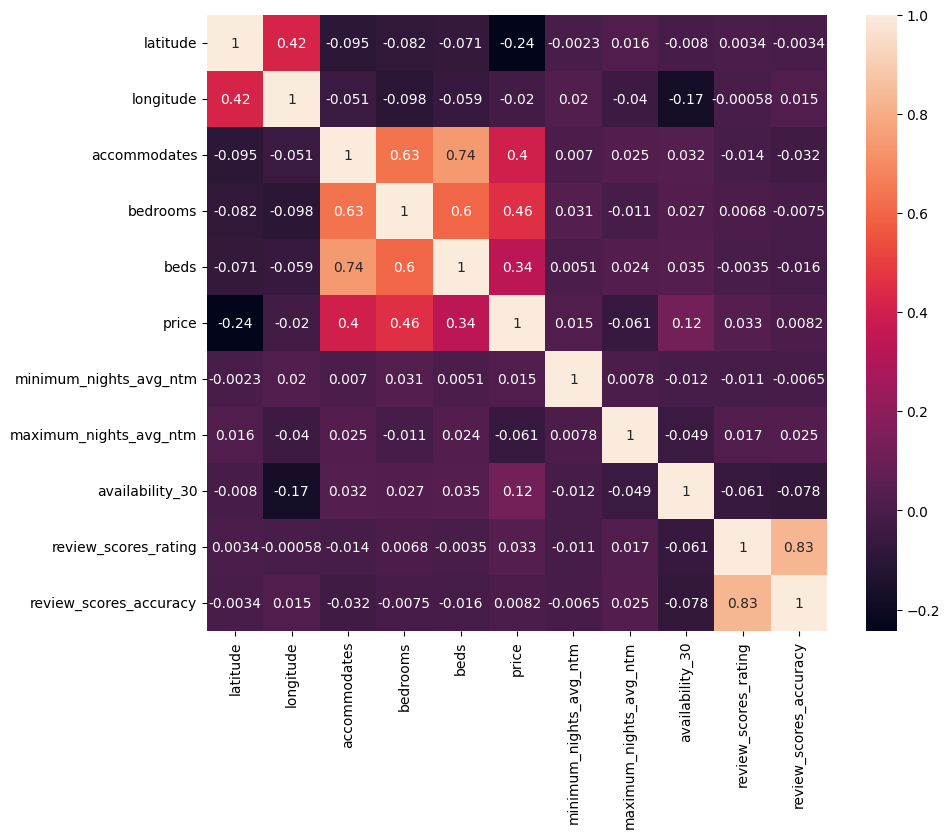

In [101]:
# Calculate the correlation matrix
correlation = df.corr()

# Create the figure with a larger size
plt.figure(figsize=(10,8))

# Create the heatmap
sns.heatmap(correlation, annot=True)

# Display the plot
plt.show()

The correlation value ranges from -1 to 1. A value close to 1 indicates a strong positive correlation. A value close to -1 indicates a strong negative correlation. A value close to 0 indicates no correlation.
But in this case we are interested in the price correlation.

In [102]:
#drop columns that have no correlation with prices
df.drop(['availability_30','minimum_nights_avg_ntm','maximum_nights_avg_ntm'], axis=1, inplace=True)
df.shape

(17065, 12)

In [103]:
pd.DataFrame(df.corr()['price'].sort_values(ascending = False)[1:])

<ipython-input-103-f2f2db4a3f8a>:1: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



,price
bedrooms,0.459843
accommodates,0.398701
beds,0.336044
review_scores_rating,0.033160
review_scores_accuracy,0.008220
longitude,-0.020166
latitude,-0.243164


#4.4- Word Cloud

**Count of the most advertised neighbourhood**

In [104]:
from wordcloud import WordCloud

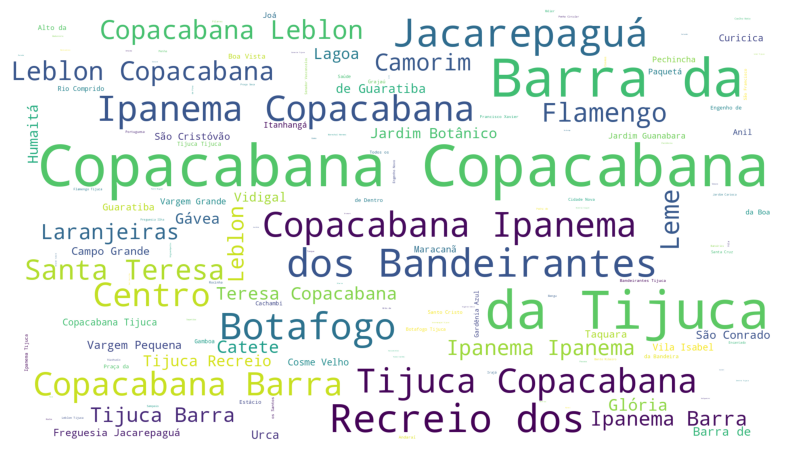

In [105]:
plt.subplots(figsize=(10,10))
wordcloud = WordCloud(
                          background_color='white',
                          width=1920,
                          height=1080
                         ).generate(" ".join(df.neighbourhood))
plt.imshow(wordcloud)
plt.axis('off')
plt.savefig('neighbourhood.png')
plt.show()

In [106]:
# Frequency of accommodation types in terms of percentage.
df['neighbourhood'].value_counts(normalize=True) * 100

Copacabana                  34.380311
Ipanema                     11.233519
Barra da Tijuca             10.032230
Leblon                       5.742748
Recreio dos Bandeirantes     4.670378
                              ...    
Deodoro                      0.005860
Vila Militar                 0.005860
Vicente de Carvalho          0.005860
Magalhães Bastos             0.005860
Cordovil                     0.005860
Name: neighbourhood, Length: 130, dtype: float64

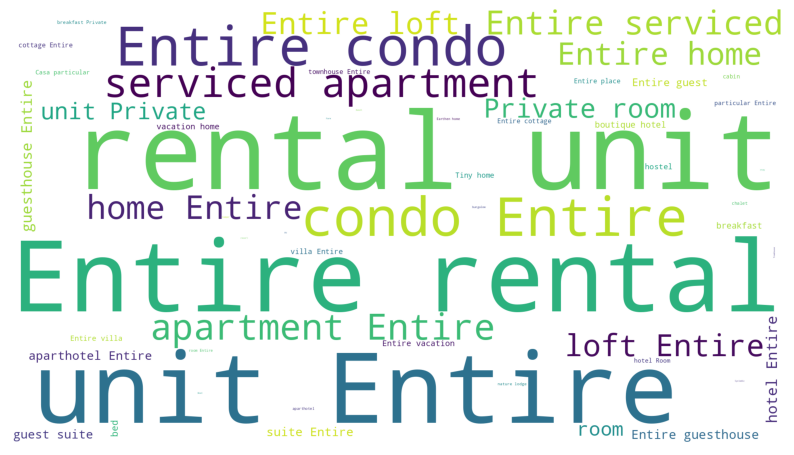

In [107]:
plt.subplots(figsize=(10,10))
wordcloud = WordCloud(
                          background_color='white',
                          width=1920,
                          height=1080
                         ).generate(" ".join(df.property_type))
plt.imshow(wordcloud)
plt.axis('off')
plt.savefig('property_type.png')
plt.show()

**Count of the most advertised property_type's**

In [108]:
# Frequency of accommodation types in terms of percentage.
df['property_type'].value_counts(normalize=True) * 100

Entire rental unit                    76.185174
Entire condo                           8.479344
Entire serviced apartment              3.732786
Entire home                            3.275711
Entire loft                            3.099912
Private room in rental unit            0.714914
Room in hotel                          0.544975
Entire guesthouse                      0.433636
Room in aparthotel                     0.433636
Private room in serviced apartment     0.357457
Entire guest suite                     0.304717
Private room in guesthouse             0.234398
Private room in bed and breakfast      0.222678
Private room in home                   0.216818
Room in boutique hotel                 0.187518
Entire vacation home                   0.164079
Private room in condo                  0.152359
Entire villa                           0.134779
Tiny home                              0.117199
Private room in hostel                 0.111339
Private room in guest suite            0

**Count of the most advertised room_type's**

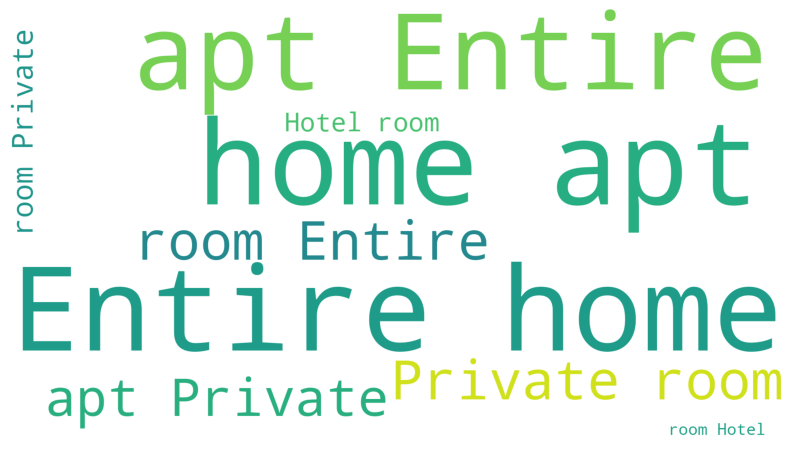

In [109]:
plt.subplots(figsize=(10,10))
wordcloud = WordCloud(
                          background_color='white',
                          width=1920,
                          height=1080
                         ).generate(" ".join(df.room_type))
plt.imshow(wordcloud)
plt.axis('off')
plt.savefig('room_type.png')
plt.show()

In [110]:
# Frequency of accommodation types in terms of percentage.
df['room_type'].value_counts(normalize=True) * 100

Entire home/apt    96.800469
Private room        2.988573
Hotel room          0.210958
Name: room_type, dtype: float64

#4.5 - Pie Chart of neighbourhood, room type and property type in order to clean outliers

**Selection top5 property an top5 neighborhood**

In [111]:
# List of desired values
property_selection = ['Entire rental unit', 'Entire condo', 'Entire home', 'Entire serviced apartment', 'Entire loft']
# Filter the DataFrame
df = df[df['property_type'].isin(property_selection)]

In [112]:
df['property_type'].value_counts(normalize=True) * 100

Entire rental unit           80.387065
Entire condo                  8.947010
Entire serviced apartment     3.938663
Entire home                   3.456378
Entire loft                   3.270884
Name: property_type, dtype: float64

In [113]:
# List of desired values
neighborhood_selection = ["Copacabana", "Ipanema", "Barra da Tijuca", "Leblon", "Recreio dos Bandeirantes"]

# Filter the DataFrame
df = df[df['neighbourhood'].isin(neighborhood_selection)]

In [114]:
df['neighbourhood'].value_counts(normalize=True) * 100

Copacabana                  52.662451
Ipanema                     16.854550
Barra da Tijuca             14.673266
Leblon                       8.825955
Recreio dos Bandeirantes     6.983778
Name: neighbourhood, dtype: float64

In [115]:
# First, count the occurrences of each neighborhood in the filtered DataFrame
neighbourhood_counts = df['neighbourhood'].value_counts()

# Select the top 5 most common neighborhoods
top_neighbourhoods = neighbourhood_counts[:5]

# Create a DataFrame with the top neighborhoods
df_top = pd.DataFrame({'neighbourhood': top_neighbourhoods.index, 'count': top_neighbourhoods.values})

# Create a pie chart with the aggregated data
fig = px.pie(df_top, names='neighbourhood', values='count', hole=0.4, title="Top 5 Neighbourhood: Distribution")
fig.update_traces(textposition='inside', textinfo='percent+label')

In [116]:
# First, count the occurrences of each property_type in the filtered DataFrame
property_type_counts = df['property_type'].value_counts()

# Select the top 5 most common neighborhoods
top_property_type= property_type_counts[:5]

# Create a DataFrame with the top neighborhoods
df_top_property = pd.DataFrame({'property_type': top_property_type.index, 'count': top_property_type.values})

# Create a pie chart with the aggregated data
fig = px.pie(df_top_property, names='property_type', values='count', hole=0.4, title="Top 5 Property_type: Distribuition")
fig.update_traces(textposition='inside', textinfo='percent+label')

In [117]:
# First, count the occurrences of each neighborhood in the filtered DataFrame
room_type_counts = df['room_type'].value_counts()

# Select the top 5 most common neighborhoods
top_room_type = room_type_counts[:5]

# Create a DataFrame with the top neighborhoods
df_top = pd.DataFrame({'room_type': top_room_type.index, 'count': top_room_type.values})

# Create a pie chart with the aggregated data
fig = px.pie(df_top, names='room_type', values='count', hole=0.4, title="Top room_type: Distribution")
fig.update_traces(textposition='inside', textinfo='percent+label')

# 4.6 Plot of the most Top 5 neighbourhoods/ Price category/ Reviews scores of RJ

In [118]:
from IPython.display import Image, display
from matplotlib.offsetbox import AnnotationBbox, OffsetImage

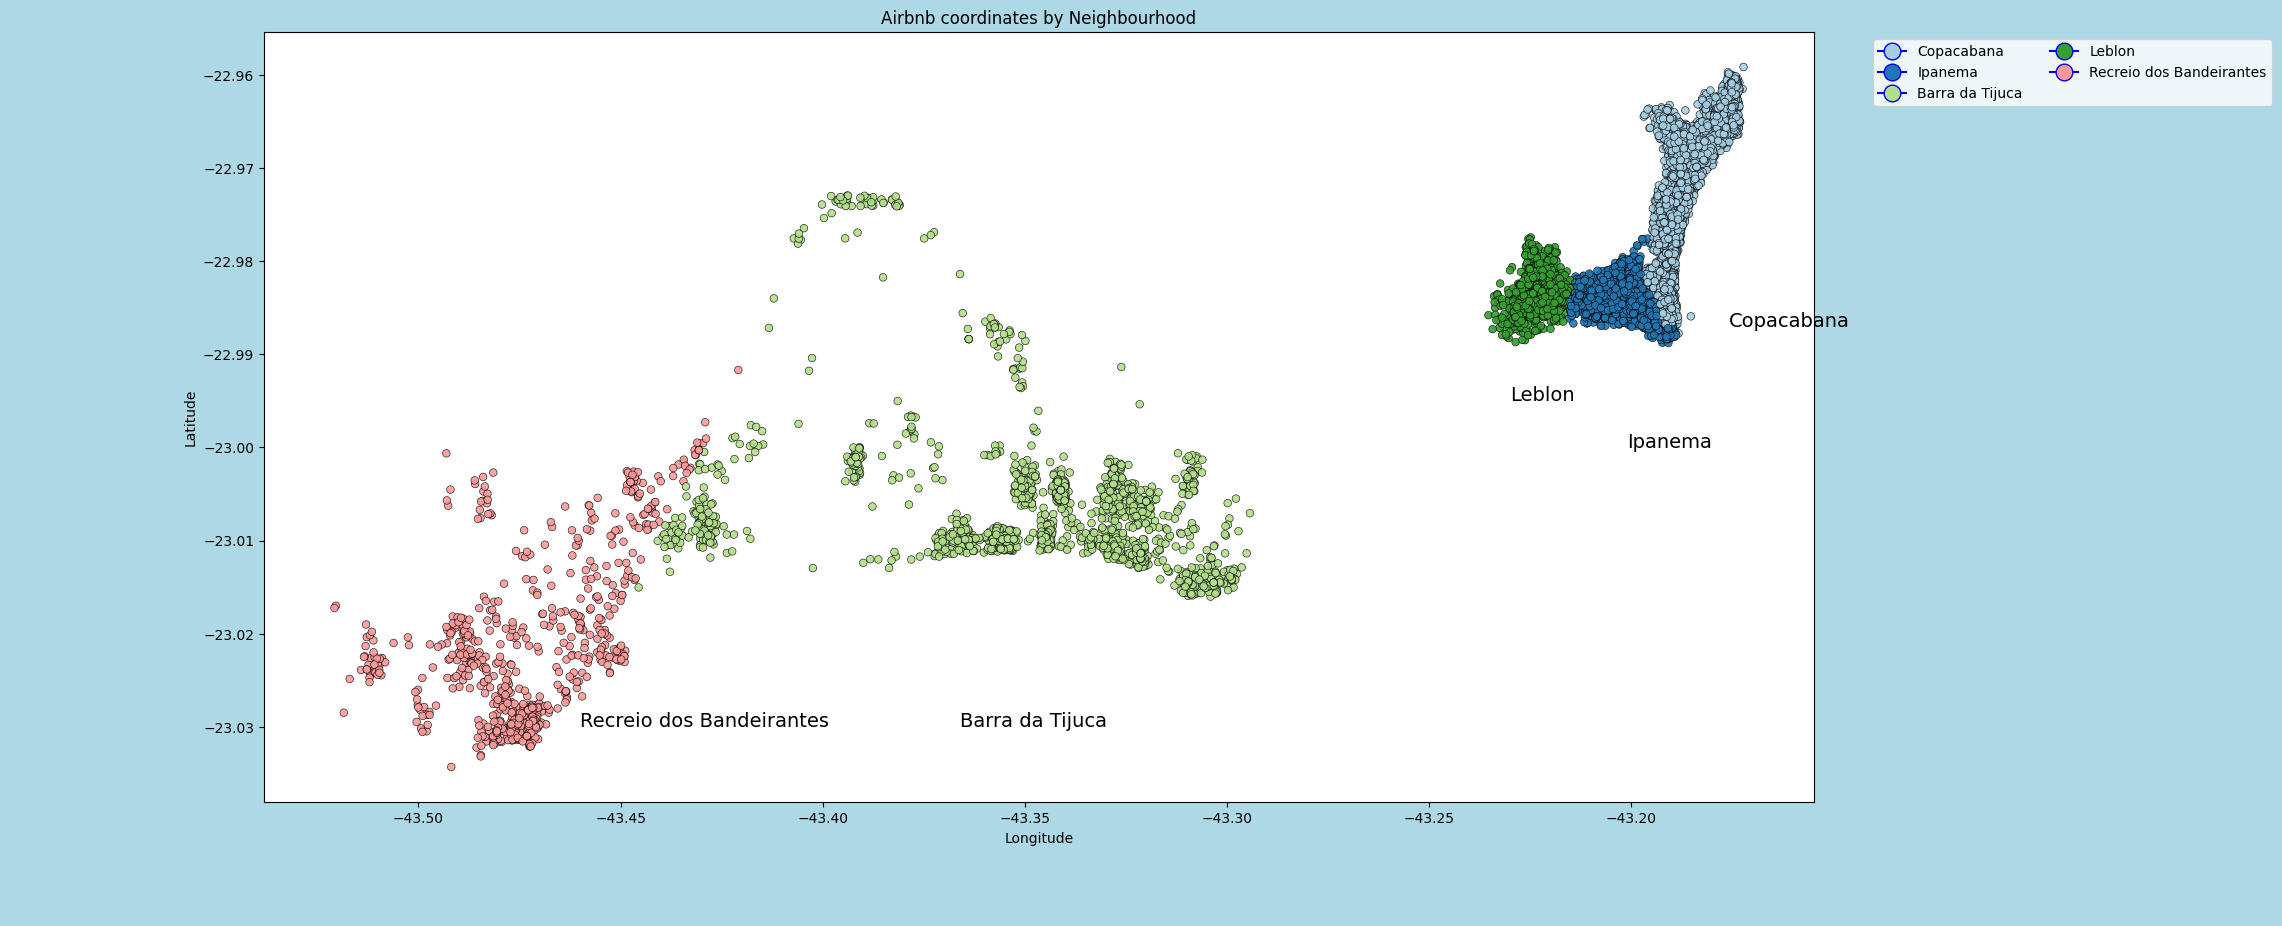

In [119]:
# Create a scatterplot
fig, ax = plt.subplots(figsize=(20, 10))
sns.scatterplot(x='longitude', y='latitude', data=df, hue='neighbourhood',
               palette='Paired', alpha=0.9, edgecolor='black', s=30, ax=ax)

# Change the map background to gray
fig.set_facecolor(('#add8e6'))

# Add annotations for Sugar Loaf Mountain and Christ the Redeemer
ax.annotate('Sugar Loaf Mountain', xy=(-43.1643, -22.9480), xytext=(-43.165, -22.94),
            arrowprops=dict(facecolor='red', shrink=0.05), fontsize=14, color='black')
ax.annotate('Christ the Redeemer', xy=(-43.2105, -22.9519), xytext=(-43.312, -22.952),
            arrowprops=dict(facecolor='blue', shrink=0.01), fontsize=14, color='black')

# Load an image of Christ the Redeemer and place it on the map
image = plt.imread('/content/drive/MyDrive/christ-the-redeemer.png')
# Reducing zoom to 1%
imagebox = OffsetImage(image, zoom=0.02)
ab = AnnotationBbox(imagebox, (-43.2105, -22.9519), frameon=False)
ax.add_artist(ab)

# Add names to the neighborhoods
ax.annotate('Copacabana', xy=(-43.1753, -22.9659), xytext=(-43.176, -22.987), fontsize=14, color='black')
ax.annotate('Barra da Tijuca', xy=(-43.3651, -23.0094), xytext=(-43.366, -23.030), fontsize=14, color='black')
ax.annotate('Ipanema', xy=(-43.1985, -22.9846), xytext=(-43.201, -23.000), fontsize=14, color='black')
ax.annotate('Recreio dos Bandeirantes', xy=(-43.4634, -23.0137), xytext=(-43.460, -23.030), fontsize=14, color='black')
ax.annotate('Leblon', xy=(-43.2231, -22.9843), xytext=(-43.230, -22.995), fontsize=14, color='black')


neighbourhoods_to_display = df['neighbourhood'].unique()[:6]
custom_legend = [plt.Line2D([0], [0], marker='o', color='blue', markerfacecolor=color, markersize=12, label=neighbourhood)
                 for neighbourhood, color in zip(neighbourhoods_to_display, sns.color_palette('Paired', n_colors=len(neighbourhoods_to_display)))]
ax.legend(handles=custom_legend, loc='upper right', bbox_to_anchor=(1.3, 1), ncol=2, fancybox=True, shadow=False)

ax.grid(False)
ax.set_ylabel('Latitude')
ax.set_xlabel('Longitude')
ax.set_title("Airbnb coordinates by Neighbourhood")

plt.show()


**Create a new column called: "price category"**

In [120]:
# Calculate the mean of prices
mean_price = df['price'].mean()

# Set the category limits
low_limit = mean_price - 2 * df['price'].std()
medium_low_limit = mean_price - df['price'].std()
medium_high_limit = mean_price + df['price'].std()
high_limit = mean_price + 2 * df['price'].std()

# Create a category column based on the defined limits
df['price_category'] = pd.cut(df['price'], bins=[-np.inf, low_limit, medium_low_limit, medium_high_limit, high_limit, np.inf],
                              labels=['Very Low', 'Low', 'Medium', 'High', 'Very High'])

<ipython-input-121-92e7b5a2da18>:4: UserWarning:


The palette list has fewer values (4) than needed (5) and will cycle, which may produce an uninterpretable plot.



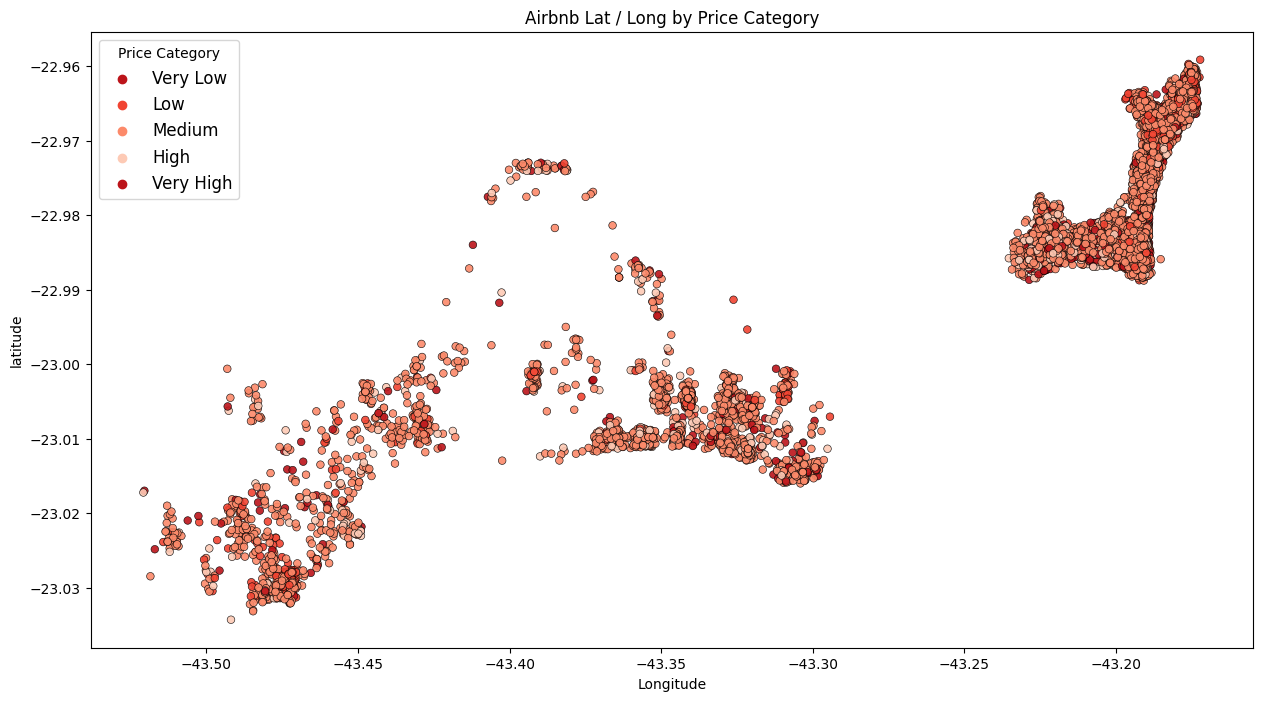

In [121]:
# Create a scatterplot based on the price categories
fig, ax = plt.subplots(figsize=(15, 8))
custom_palette = sns.color_palette("Reds_r", n_colors=len(df['price_category'].unique()))
sns.scatterplot(x='longitude', y='latitude', data=df, hue='price_category',
                palette=custom_palette, alpha=0.9, edgecolor='black', s=30, ax=ax)

plt.grid(False)
plt.xlabel('Longitude')
plt.title("Airbnb Lat / Long by Price Category")

# Adjust the legend
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles, labels, title='Price Category', fontsize='12')

**Dataset information: Most/least expensive of the listing**

In [122]:
# Find the listing with the highest price
most_expensive_listing = df[df['price'] == df['price'].max()]
most_expensive_listing = most_expensive_listing.iloc[0]
print("Most expensive listing:")
print(most_expensive_listing)

Most expensive listing:
neighbourhood                        Ipanema
latitude                           -22.98604
longitude                          -43.20693
property_type             Entire rental unit
room_type                    Entire home/apt
accommodates                               5
bedrooms                                 2.0
beds                                     3.0
price                                 1200.0
has_availability                           t
review_scores_rating                     5.0
review_scores_accuracy                   5.0
price_category                     Very High
Name: 838, dtype: object


In [123]:
# Find the listing with the lowest price
least_expensive_listing = df[df['price'] == df['price'].min()]
least_expensive_listing = least_expensive_listing.iloc[0]
print("Least expensive listing:")
print(least_expensive_listing)

Least expensive listing:
neighbourhood                     Copacabana
latitude                           -22.95914
longitude                          -43.17227
property_type             Entire rental unit
room_type                    Entire home/apt
accommodates                               2
bedrooms                                 1.0
beds                                     1.0
price                                   50.0
has_availability                           t
review_scores_rating                    4.27
review_scores_accuracy                  4.39
price_category                           Low
Name: 7216, dtype: object


**Distribution of Distribution of Review Scores Rating and Review Accuracy Scores   - the percentage of stars in reviews ***** **

<ipython-input-124-ea01efd97b2d>:8: FutureWarning:



`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.


<ipython-input-124-ea01efd97b2d>:13: FutureWarning:



`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.




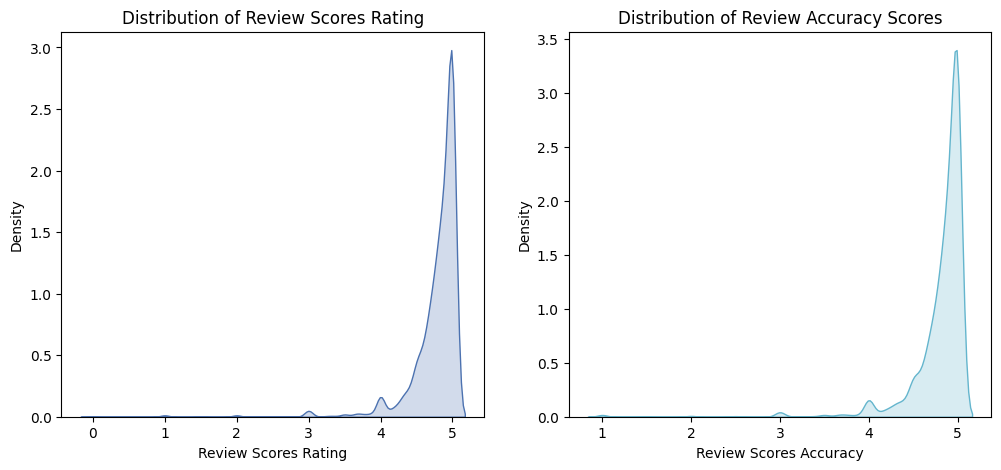

In [124]:
# Create subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

# Set the style for the plot
sns.set(style="whitegrid")

# Plot the first subplot
sns.kdeplot(df['review_scores_rating'], shade=True, color="b", ax=ax1)
ax1.set_title("Distribution of Review Scores Rating")
ax1.set_xlabel("Review Scores Rating")

# Plot the second subplot
sns.kdeplot(df['review_scores_accuracy'], shade=True, color="c", ax=ax2)
ax2.set_title("Distribution of Review Accuracy Scores")
ax2.set_xlabel("Review Scores Accuracy")

# Display the plot
plt.show()


In [125]:
#the total number of reviews (sum) per neighbourhood.
reviews_by_neighbourhood = df.groupby(['neighbourhood'])['review_scores_rating', 'review_scores_accuracy'].sum().reset_index()
top_reviews_by_neighbourhood = reviews_by_neighbourhood.sort_values(by='review_scores_rating', ascending=False)
print(top_reviews_by_neighbourhood.head())

              neighbourhood  review_scores_rating  review_scores_accuracy
1                Copacabana              27365.09                27572.68
2                   Ipanema               8800.61                 8845.21
0           Barra da Tijuca               7675.17                 7712.89
3                    Leblon               4605.45                 4643.87
4  Recreio dos Bandeirantes               3635.85                 3651.32


<ipython-input-125-ce612ba42bce>:2: FutureWarning:

Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.



#Step 5: Machine Learning Regression

#Regression Analysis

In [126]:
df.head()

,neighbourhood,latitude,longitude,property_type,room_type,accommodates,bedrooms,beds,price,has_availability,review_scores_rating,review_scores_accuracy,price_category
0,Copacabana,-22.98238,-43.19215,Entire rental unit,Entire home/apt,4,1.0,1.0,180.0,t,4.73,4.83,Low
1,Copacabana,-22.97787,-43.18792,Entire rental unit,Entire home/apt,4,1.0,1.0,350.0,t,4.71,4.76,Medium
2,Copacabana,-22.96488,-43.17478,Entire rental unit,Entire home/apt,5,1.0,4.0,190.0,t,4.89,4.96,Medium
3,Copacabana,-22.96599,-43.17940,Entire condo,Entire home/apt,5,2.0,2.0,279.0,t,4.70,4.77,Medium
4,Copacabana,-22.97735,-43.19105,Entire rental unit,Entire home/apt,3,1.0,1.0,330.0,t,4.71,4.69,Medium


In [127]:
#Create a copy of dataframe for encoding
df_en = df.copy()

#Encode the input Variables
for column in df_en.columns[df_en.columns.isin(['neighbourhood', 'property_type'])]:
    df_en[column] = df_en[column].factorize()[0]

In [128]:
# 'availability_30','minimum_nights_avg_ntm','maximum_nights_avg_ntm'
df_en.drop(['latitude','longitude','has_availability','price_category','room_type'], axis=1, inplace=True)
#examing the changes
df_en.head()

,neighbourhood,property_type,accommodates,bedrooms,beds,price,review_scores_rating,review_scores_accuracy
0,0,0,4,1.0,1.0,180.0,4.73,4.83
1,0,0,4,1.0,1.0,350.0,4.71,4.76
2,0,0,5,1.0,4.0,190.0,4.89,4.96
3,0,1,5,2.0,2.0,279.0,4.70,4.77
4,0,0,3,1.0,1.0,330.0,4.71,4.69


<Axes: >

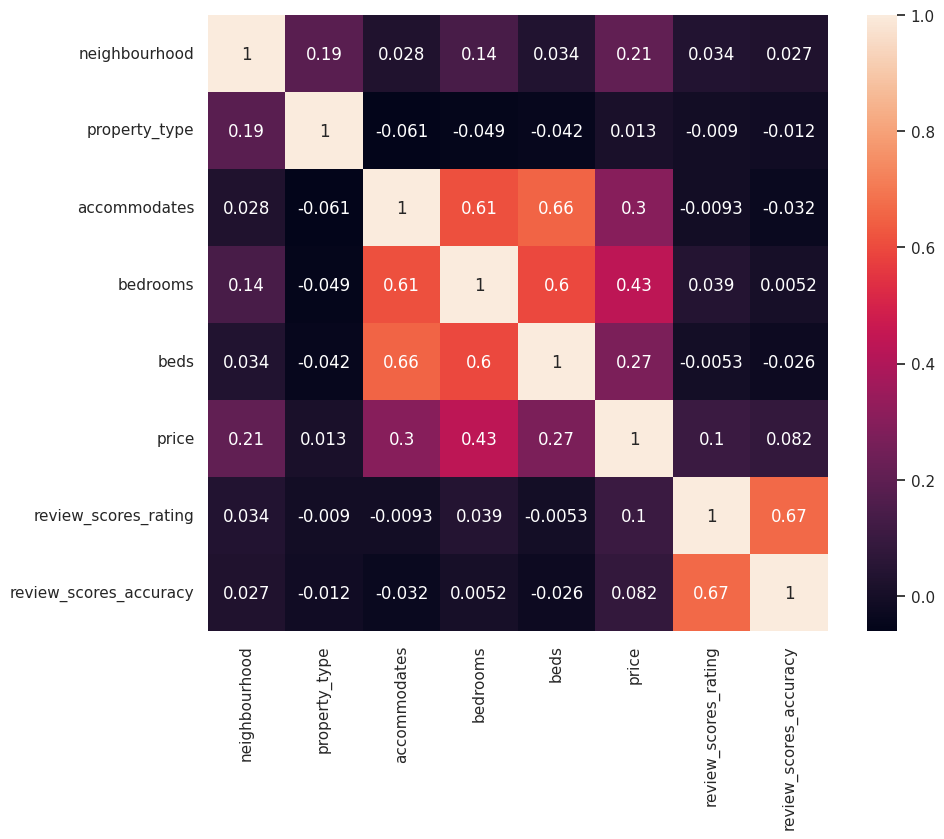

In [129]:
corr = df_en.corr(method='kendall')
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True)

In [130]:
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import r2_score

In [131]:
#Defining the independent variables and dependent variables
x = df_en.iloc[:,[0,1,2,3,4,6,7]]
y = df_en['price']

#Getting Test and Training Set
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.1,random_state=353)
x_train.head()
y_train.head()

7110     300.0
19341    697.0
12393    158.0
12534    355.0
20288    167.0
Name: price, dtype: float64

In [132]:
#x.drop(['beds', 'minimum_nights_avg_ntm', 'maximum_nights_avg_ntm',
#       'availability_30', 'review_scores_rating', 'review_scores_accuracy'], axis=1, inplace=True)
x_train.shape
x_train.columns

Index(['neighbourhood', 'property_type', 'accommodates', 'bedrooms', 'beds',
       'review_scores_rating', 'review_scores_accuracy'],
      dtype='object')

In [133]:
#Prepare a Linear Regression Model
reg=LinearRegression()
reg.fit(x_train,y_train)
y_pred=reg.predict(x_test)
r2_score(y_test,y_pred)

0.26477012920893606

In [134]:
#Preparing a Decision Tree Regression
from sklearn.tree import DecisionTreeRegressor
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.1,random_state=105)
DTree=DecisionTreeRegressor(min_samples_leaf=.0001)
DTree.fit(x_train,y_train)
y_predict=DTree.predict(x_test)
r2_score(y_test,y_predict)

-0.06417319312157033

In [135]:
from sklearn.metrics import mean_absolute_error
mae = mean_absolute_error(y_test, y_pred)
print("Mean Absolute Error (MAE):", mae)

Mean Absolute Error (MAE): 208.2965898197717


In [136]:
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error (MSE):", mse)

Mean Squared Error (MSE): 74100.43030463891


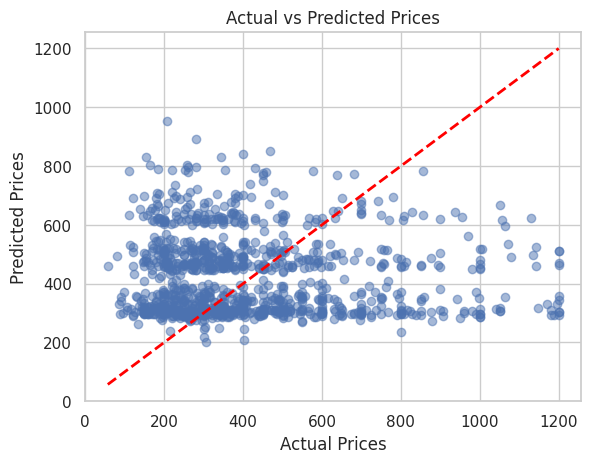

In [137]:
# Plotting actual vs predicted prices
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='--', color='red', linewidth=2)
plt.title('Actual vs Predicted Prices')
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.show()


# Conclusion


In conclusion of exploratory analysis of Airbnb data 2023 in Rio de Janeiro provided valuable insights into the dynamics of pricing and preferences in different neighborhoods. The prominence of Copacabana as the most expensive and sought-after region underscores its significance in the Airbnb landscape. The preference for entire houses/apartments and the prevalence of complete rental units offer actionable information for both hosts and guests.

Utilizing Wordcloud for qualitative analysis added depth to our exploration, revealing nuanced aspects of the text data associated with Airbnb listings. By examining the number of reviews, we identified the top-rated neighborhoods, offering potential visitors valuable information for making informed choices.

As we reflect on the average daily price of approximately US$340, we recognize the limitations posed by the absence of specific data points, such as property year, decoration type, luxury or standard categorization, and seasonal variations.

Future research could delve deeper into these aspects, enriching our understanding of the Airbnb landscape in Rio de Janeiro.

This concludes our project analysis, contributing insights that extend beyond the current scope. The findings not only serve as a resource for travelers but also lay the groundwork for potential future investigations into the multifaceted world of Airbnb accommodations in this vibrant city.




